In [59]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import seaborn as sns

In [60]:
path = "/Users/coes3/phd-labs/fraganal/data_source/tor/"

In [61]:
def is_censored(row, users, lower, upper):
    if  row[users] > row[upper]:
        return 1
    elif row[users] < row[lower]:
        return 0
    else:
        return 0

In [62]:
def data_prep(path):
    #  function to prep radar data in pandas
    
    files = Path(path).glob('*.csv')
    dfs = []
    
    for i in files:
        data = pd.read_csv(i, header = 5, parse_dates = True)
        dfs.append(data)
        
    df = pd.concat(dfs, ignore_index=True)
    df.dropna(subset = ['country'], inplace = True)
    df = df[(df["country"] != '??')]
    
    df['censored'] = df.apply(lambda row: is_censored(row,'users', 'lower', 'upper') , axis=1)
    df['country']= df['country'].str.upper()
    df.rename(columns = {'country':'cc'}, inplace = True)
    
    columns = ['upper', 'lower', 'frac']
    df.drop(columns, inplace=True, axis=1)

    return df
    

In [63]:
df = data_prep(path)

In [74]:
def plot_graph(df):
    cc_list = ['CN', 'DE', 'BR', 'IQ', 'IN', 'RW']
    plot_tup = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))
    axs.xaxis.set_major_locator(MonthLocator())
    
    for i in range(len(cc_list)):
        cc = cc_list[i]
        a, b = plot_tup[i]
        sns.lineplot(x = df.loc[df['cc'] == cc].date.values, y = df.loc[df['cc'] == cc].users.values, hue = df.loc[df['cc'] == cc].censored.values)
        axs[a, b].set_title(cc)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

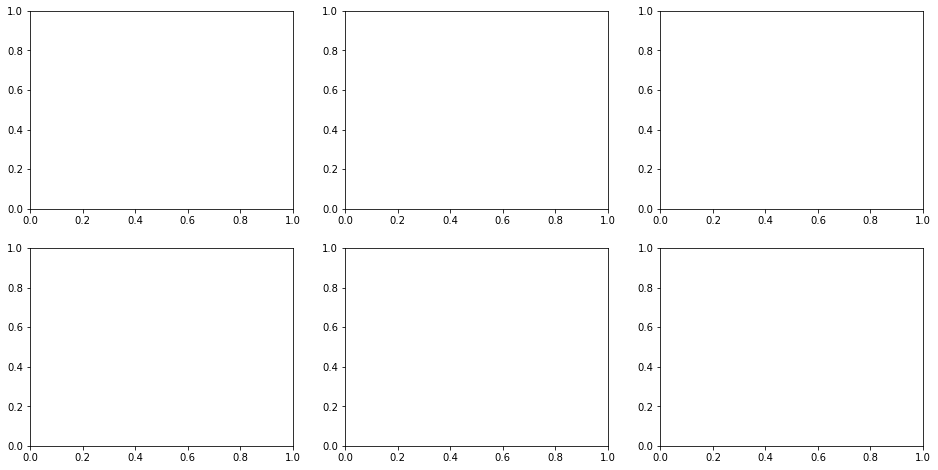

In [75]:
plot_graph(df)